In [49]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [50]:
df = pd.read_csv('Churn_Modelling.csv')

In [51]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# data preprossing

In [52]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [53]:
df.head(15)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [55]:
df.duplicated().sum()

0

In [56]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [57]:
df['Geography'].value_counts()


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [58]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [59]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [60]:
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [61]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [62]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [63]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

 # Ann model


In [65]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

seuential model

In [66]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 2s 5ms/step - loss: 0.5257 - accuracy: 0.7958 - val_loss: 0.5039 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5051 - accuracy: 0.7958 - val_loss: 0.5017 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5039 - accuracy: 0.7958 - val_loss: 0.5001 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5031 - accuracy: 0.7958 - val_loss: 0.4998 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5023 - accuracy: 0.7958 - val_loss: 0.4989 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5021 - accuracy: 0.7958 - val_loss: 0.4981 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5017 - accuracy: 0.7958 - val_loss: 0.4978 - val_accuracy: 0.7969

Epoch 58/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.7958 - val_loss: 0.4949 - val_accuracy: 0.7969
Epoch 59/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4997 - accuracy: 0.7958 - val_loss: 0.4950 - val_accuracy: 0.7969
Epoch 60/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4996 - accuracy: 0.7958 - val_loss: 0.4949 - val_accuracy: 0.7969
Epoch 61/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.7958 - val_loss: 0.4952 - val_accuracy: 0.7969
Epoch 62/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4998 - accuracy: 0.7958 - val_loss: 0.4949 - val_accuracy: 0.7969
Epoch 63/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.7958 - val_loss: 0.4953 - val_accuracy: 0.7969
Epoch 64/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.7958 - val_loss: 0.4949 - val_accuracy:

In [70]:
model.layers[1].get_weights()

[array([[ 2.06771746e-01, -3.56227100e-01, -1.95376948e-02,
         -3.20550412e-01,  3.86219263e-01,  8.96952003e-02,
          6.42529083e-03,  1.32086858e-01, -3.12521070e-01,
         -1.30134031e-01, -2.96278950e-02],
        [-4.08367142e-02, -1.16742238e-01, -1.22116432e-01,
         -9.34856832e-02,  1.09597459e-01, -3.06468699e-02,
          4.98257548e-01, -3.24239492e-01, -2.87379175e-01,
         -3.88736844e-01, -3.64776254e-01],
        [-2.23142073e-01,  4.80945259e-01, -1.53772971e-02,
         -4.28808540e-01,  1.18307784e-01, -3.24464440e-01,
         -1.53631970e-01, -5.08711450e-02, -2.20806301e-01,
          2.72862315e-01,  3.31963599e-01],
        [-3.21421176e-01,  4.55615491e-01, -9.58763063e-02,
         -2.38684937e-01, -3.61967176e-01, -3.10759395e-01,
          2.30135977e-01, -3.09444726e-01,  3.27919066e-01,
          1.77258283e-01, -6.82750391e-03],
        [ 3.23074162e-01,  1.03398681e-01,  3.94386321e-01,
         -5.08937687e-02, -3.71423662e-01, -

In [72]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [73]:
y_pred

array([[0.24495377],
       [0.24495377],
       [0.24495377],
       ...,
       [0.24495377],
       [0.25477704],
       [0.24495377]], dtype=float32)

In [74]:
y_pred = y_pred.argmax(axis=-1)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

In [76]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')


Accuracy on the test set: 79.75%


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('new_model.h5')  # Replace 'your_model.h5' with the actual file name


In [78]:
import matplotlib.pyplot as plt

In [83]:
history.history

{'loss': [0.5256884694099426,
  0.5051071643829346,
  0.5038518309593201,
  0.5031068921089172,
  0.5022721886634827,
  0.502111554145813,
  0.5016838312149048,
  0.5014349222183228,
  0.5010616183280945,
  0.5009359121322632,
  0.5006418228149414,
  0.5004329085350037,
  0.5005962252616882,
  0.5004646182060242,
  0.5004688501358032,
  0.5004380345344543,
  0.5000301599502563,
  0.500153660774231,
  0.4999701678752899,
  0.499881386756897,
  0.49997204542160034,
  0.4999353289604187,
  0.499828577041626,
  0.49970757961273193,
  0.49952709674835205,
  0.49981528520584106,
  0.49979937076568604,
  0.4996609091758728,
  0.49971824884414673,
  0.4996594488620758,
  0.4998575448989868,
  0.4997529089450836,
  0.4995231628417969,
  0.49964287877082825,
  0.4998452365398407,
  0.4998047649860382,
  0.4996907114982605,
  0.49980899691581726,
  0.4995117485523224,
  0.49951666593551636,
  0.4996004104614258,
  0.49996957182884216,
  0.49976611137390137,
  0.49981820583343506,
  0.499807745218

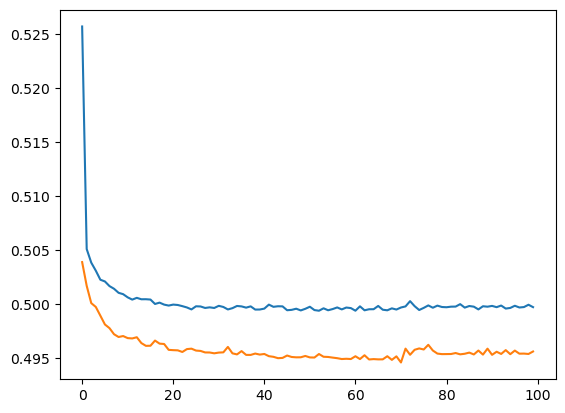

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

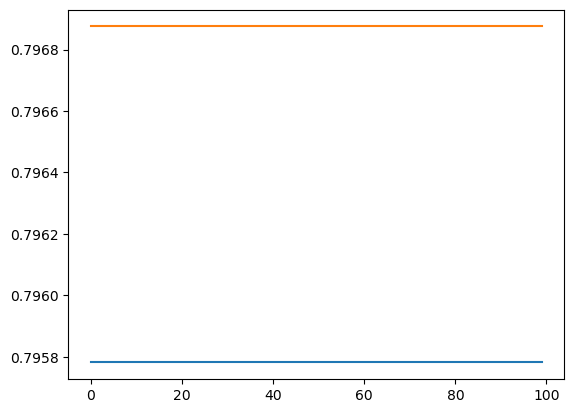

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])